In [38]:
import os
import pandas_datareader as pdr
import pandas as pd
from dotenv import load_dotenv

load_dotenv()
GOOG = pdr.get_data_tiingo('GOOG',api_key = os.getenv('api_key'))
GOOG.tail()

/var/folders/lw/6vvkjf6919ndmlnqfvwpynlh0000gn/T/ipykernel_78095/1984705316.py:7: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  GOOG = pdr.get_data_tiingo('GOOG',api_key = os.getenv('api_key'))


close     high      low    open    volume  \
symbol date                                                                    
GOOG   2025-02-27 00:00:00+00:00  170.21  176.590  169.752  175.94  25930530   
       2025-02-28 00:00:00+00:00  172.22  172.500  168.390  170.30  30049812   
       2025-03-03 00:00:00+00:00  168.66  175.000  167.640  173.73  24121991   
       2025-03-04 00:00:00+00:00  172.61  175.165  167.540  167.94  30711408   
       2025-03-05 00:00:00+00:00  174.99  175.750  170.930  172.32  18848036   

                                  adjClose  adjHigh   adjLow  adjOpen  \
symbol date                                                             
GOOG   2025-02-27 00:00:00+00:00    170.21  176.590  169.752   175.94   
       2025-02-28 00:00:00+00:00    172.22  172.500  168.390   170.30   
       2025-03-03 00:00:00+00:00    168.66  175.000  167.640   173.73   
       2025-03-04 00:00:00+00:00    172.61  175.165  167.540   167.94   
       2025-03-05 00:00:00+00:00    174.99  175.750  170.930   172.32   

                                  adjVolume  divCash  splitFactor  
symbol date                                                        
GOOG   2025-02-27 00:00:00+00:00   25930530      0.0          1.0  
       2025-02-28 00:00:00+00:00   30049812      0.0          1.0  
       2025-03-03 00:00:00+00:00   24121991      0.0          1.0  
       2025-03-04 00:00:00+00:00   30711408      0.0          1.0  
       2025-03-05 00:00:00+00:00   18848036      0.0          1.0

In [40]:
GOOG_adj=GOOG.iloc[:,5:9] 
GOOG_adj.columns = ['Close', 'High', 'Low', 'Open'] 
GOOG_adj = GOOG_adj.reset_index() #從多index變成單一index
GOOG_adj.index = GOOG_adj['date'] # 將index設為date
GOOG_adj = GOOG_adj.iloc[-20:,2:6] 
GOOG_adj_20 = pd.DataFrame(GOOG_adj)
GOOG_adj_20


,Close,High,Low,Open
date,,,,
2025-02-05 00:00:00+00:00,193.30,194.5499,189.910,193.100
2025-02-06 00:00:00+00:00,193.31,193.8300,190.490,190.990
2025-02-07 00:00:00+00:00,187.14,193.0150,185.100,192.740
2025-02-10 00:00:00+00:00,188.20,189.9900,187.610,189.060
2025-02-11 00:00:00+00:00,187.07,188.8000,186.080,186.835
2025-02-12 00:00:00+00:00,185.43,186.8300,183.630,185.230
2025-02-13 00:00:00+00:00,187.88,187.9900,184.880,185.930
2025-02-14 00:00:00+00:00,186.87,188.1500,186.110,186.830
2025-02-18 00:00:00+00:00,185.80,187.7800,183.580,187.440


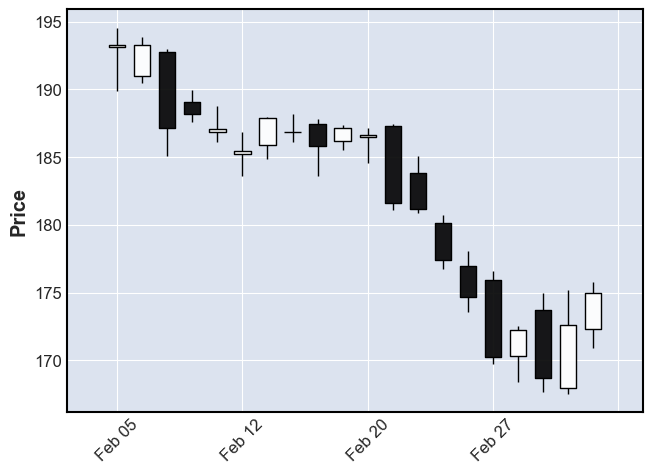

In [42]:
# 繪製K線圖
import mplfinance as mpf
mpf.plot(GOOG_adj_20,type='candle')

In [50]:
# 分析K線型態

GOOG_adj2=GOOG.iloc[:,5:9] 
GOOG_adj2.columns = ['Close', 'High', 'Low', 'Open'] 
GOOG_adj2 = GOOG_adj2.reset_index() #從多index變成單一index
GOOG_adj2.index = GOOG_adj2['date'] # 將index設為date
GOOG_adj2 = GOOG_adj2.iloc[:,2:6]
GOOG_adj2025 = GOOG_adj2.iloc[-365:,:] # 拿取前365天的數據
GOOG_adj2025_open = GOOG_adj2025.Open # 開盤
GOOG_adj2025_close = GOOG_adj2025.Close # 收盤
GOOG_2025_change = abs(GOOG_adj2025_open - GOOG_adj2025_close)
GOOG_2025_change.describe() 

count    365.000000
mean       1.611681
std        1.372355
min        0.000000
25%        0.607810
50%        1.325225
75%        2.221993
max       10.010000
dtype: float64

### 從上面的資料可以看到，GOOG在過去一年的交易日內：

1. 平均漲跌點數為1.611681，因此在篩選第一根K棒的時候，可以取振幅大於這個數字的，會是相對比較大根的K棒
2. 第2根K棒要取相對比較小根的，所以可以取25百分點的這個數字為標準
3. 第3根K棒的振幅要超過第1根的一半，因此我們可以用-0.805為標準來篩選

In [63]:
# 抓取 第1根大振幅陽線、第2根小振幅陽線或陰線、第3根陰線且振幅大於第1根的1/2
evening_condition_1 = [0,0]
for i in range(2, len(GOOG_2025_change)):
    if ( GOOG_2025_change[i-2] > 1.611 ) & ( abs(GOOG_2025_change[i-1]) < 0.607810) & ( GOOG_2025_change[i] < -0.805 ):
        evening_condition_1.append(1)
    else:
        evening_condition_1.append(0)
evening_condition_1.count(1)

0

In [71]:
# 第2根的開盤與收盤價 均大於 第1根的收盤與第3根的開盤
evening_condition_2 = [0,0]
for i in range(2, len(GOOG_2025_change)):
    if ( GOOG_2025_change[i-1] > GOOG_2025_change[i-2] ) & ( GOOG_2025_change[i-1] > GOOG_2025_change[i] ) & ( GOOG_2025_change[i-1] > GOOG_2025_change[i-2] ) & ( GOOG_2025_change[i-1] > GOOG_2025_change[i] ):
        evening_condition_2.append(1)
    else:
        evening_condition_2.append(0)
evening_condition_2.count(1)

124

In [77]:
# Evening Star Signal
evening_star_signal = []
for i in range(len(evening_condition_1)):
    if ( evening_condition_1[i] == 1 ) & ( evening_condition_2[i] == 1 ):
        evening_star_signal.append(1)
    else:
        evening_star_signal.append(0)
        
# Find Evening Star date
for i in range(len(evening_star_signal)):
    if evening_star_signal[i] == 1:
        print(GOOG_2025_change.index[i])